In [1]:
#import required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(color_codes=True)

In [2]:
#load csv file into dataframe

df=pd.read_csv("carcar.csv")
df.head(5)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [3]:
df.shape

(428, 15)

In [4]:
#removing irrelevant columns
df=df.drop(['Model','DriveTrain','Invoice', 'Origin', 'Type'], axis=1)
df.head(5)

,Make,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,"$36,945",3.5,6.0,265,17,23,4451,106,189
1,Acura,"$23,820",2.0,4.0,200,24,31,2778,101,172
2,Acura,"$26,990",2.4,4.0,200,22,29,3230,105,183
3,Acura,"$33,195",3.2,6.0,270,20,28,3575,108,186
4,Acura,"$43,755",3.5,6.0,225,18,24,3880,115,197


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   MSRP         428 non-null    object 
 2   EngineSize   428 non-null    float64
 3   Cylinders    426 non-null    float64
 4   Horsepower   428 non-null    int64  
 5   MPG_City     428 non-null    int64  
 6   MPG_Highway  428 non-null    int64  
 7   Weight       428 non-null    int64  
 8   Wheelbase    428 non-null    int64  
 9   Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 30.2+ KB


In [6]:
#dropping duplicates using price as the reference

df=df.drop_duplicates(subset="MSRP", keep="first")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 427
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         410 non-null    object 
 1   MSRP         410 non-null    object 
 2   EngineSize   410 non-null    float64
 3   Cylinders    408 non-null    float64
 4   Horsepower   410 non-null    int64  
 5   MPG_City     410 non-null    int64  
 6   MPG_Highway  410 non-null    int64  
 7   Weight       410 non-null    int64  
 8   Wheelbase    410 non-null    int64  
 9   Length       410 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 32.0+ KB


In [7]:
#double checking the null values under cylinders column
print(df.isnull().sum())

Make           0
MSRP           0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64


In [8]:
#filling the null with the mean of the column cylinders

val=df["Cylinders"].mean()
df["Cylinders"][247]=round(val)
val=df["Cylinders"].mean()
df["Cylinders"][248]=round(val)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 427
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         410 non-null    object 
 1   MSRP         410 non-null    object 
 2   EngineSize   410 non-null    float64
 3   Cylinders    410 non-null    float64
 4   Horsepower   410 non-null    int64  
 5   MPG_City     410 non-null    int64  
 6   MPG_Highway  410 non-null    int64  
 7   Weight       410 non-null    int64  
 8   Wheelbase    410 non-null    int64  
 9   Length       410 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 48.0+ KB


C:\Users\Marlon\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
#convert msrp to integer type by removing "$" and "," then convert string to integer

df["MSRP"]=[x.replace("$", "") for x in df["MSRP"]]
df["MSRP"]=[x.replace(",", "") for x in df["MSRP"]]
df["MSRP"]=pd.to_numeric(df["MSRP"], errors="coerce")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 410 entries, 0 to 427
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         410 non-null    object 
 1   MSRP         410 non-null    int64  
 2   EngineSize   410 non-null    float64
 3   Cylinders    410 non-null    float64
 4   Horsepower   410 non-null    int64  
 5   MPG_City     410 non-null    int64  
 6   MPG_Highway  410 non-null    int64  
 7   Weight       410 non-null    int64  
 8   Wheelbase    410 non-null    int64  
 9   Length       410 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 49.6+ KB


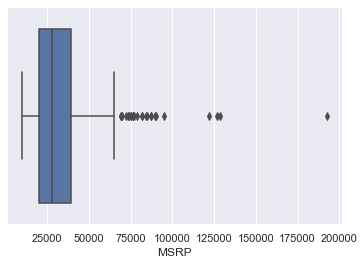

In [11]:
#detecting outliers
#use boxplot to see outliers

sns.boxplot(x=df["MSRP"])

In [12]:
#use IQR score technique to remove outliers

Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
print(IQR)

MSRP           19086.50
EngineSize         1.55
Cylinders          2.00
Horsepower        85.00
MPG_City           4.00
MPG_Highway        5.00
Weight           872.25
Wheelbase          9.00
Length            16.00
dtype: float64


In [16]:
df=df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [17]:
df.shape

(324, 10)

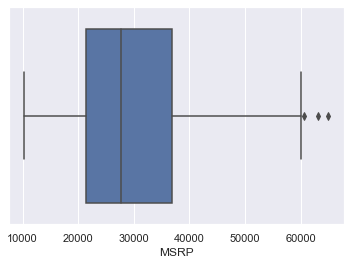

In [18]:
sns.boxplot(x=df["MSRP"])

In [19]:
#5 number summary(min,Q1, median, Q3, max )

df.describe()

,MSRP,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,29791.682099,3.102160,5.694444,209.777778,19.614198,26.583333,3541.876543,107.746914,186.259259
std,11024.164921,0.889513,1.308167,54.125642,2.914029,3.835128,564.457566,5.831814,11.569446
min,10280.000000,1.300000,4.000000,104.000000,13.000000,17.000000,2403.000000,95.000000,158.000000
25%,21436.250000,2.400000,4.000000,170.000000,18.000000,25.000000,3194.750000,104.000000,178.000000
50%,27635.000000,3.000000,6.000000,208.000000,19.000000,26.000000,3470.000000,107.000000,187.000000
75%,36907.500000,3.500000,6.000000,240.000000,21.000000,29.000000,3837.000000,112.000000,193.000000
max,65000.000000,5.700000,8.000000,350.000000,27.000000,36.000000,5270.000000,124.000000,215.000000


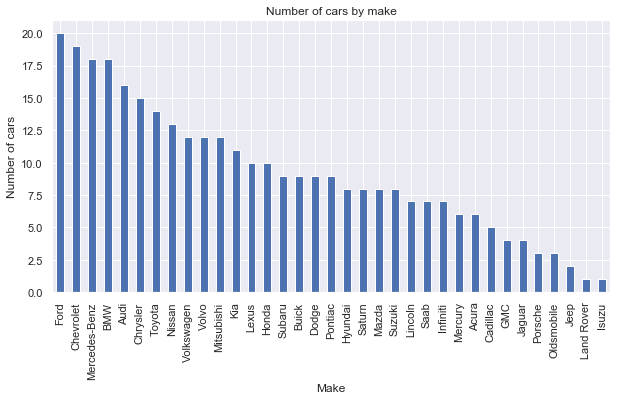

In [20]:
#visualize
#histogram to determine number of cars per maker

df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make');

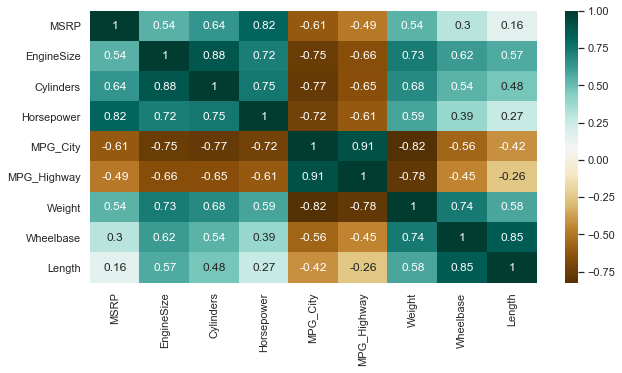

In [21]:
#heatmap to determine dependent variables/correlations
plt.figure(figsize=(10,5))
c=df.corr()
sns.heatmap(c,cmap="BrBG", annot=True)


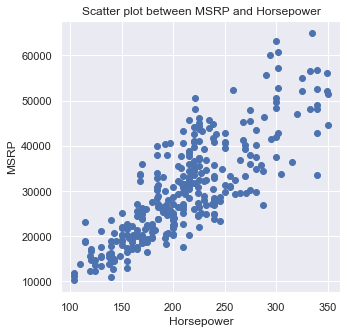

In [22]:
#there's relationship between MSRP and Horsepower, scatter plot
fig,ax=plt.subplots(figsize=(5,5))
ax.scatter(df["Horsepower"], df["MSRP"])
plt.title('Scatter plot between MSRP and Horsepower')
ax.set_xlabel("Horsepower")
ax.set_ylabel("MSRP")
plt.show()